In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, roc_curve, confusion_matrix, roc_auc_score, auc,precision_score,f1_score,precision_score,make_scorer

In [2]:
preprocessed_df = pd.read_csv('../Data/processed/processed_df.csv', encoding='latin-1')

import sys
sys.path.append(str(Path().resolve().parent))

from src.data.EDA import eda
from src.features.feature_engineering import feature_engineering
from src.features.feature_selection import feature_selection
import src.models.models as m

In [3]:
eda_df = eda(preprocessed_df)
fe_df = feature_engineering(eda_df)
df = feature_selection(fe_df)

In [4]:
y = df['Fraudulent']

In [5]:
df = df.drop(columns=["Unnamed: 0", "Fraudulent"])

In [6]:
df.head(3)

,Comnpany_Logo,Experience_executive,Qualification_doctorate,Qualification_master's degree,Qualification_vocational / certification/ professional,Job Title_embed,Profile_embed,Department_embed,Job_Description_embed,Requirements_embed,Job_Benefits_embed,Type_of_Industry_embed,Operations_embed,City_embed
0,1,0,0,0,0,[-4.58607897e-02 2.12311260e-02 3.97200175e-...,[ 5.93265845e-03 -1.16407596e-01 -3.92608084e-...,[-5.47759421e-02 1.92629527e-02 -2.80399285e-...,[-1.97166055e-02 -1.52386025e-01 -3.97011936e-...,[ 2.27894690e-02 -9.11622867e-02 -2.82628089e-...,[-6.40634298e-02 -6.89963205e-03 4.43798564e-...,[-1.01085026e-02 1.73976019e-04 -6.45253956e-...,[-5.47759123e-02 1.92629490e-02 -2.80399658e-...,[ 8.63630399e-02 -1.98833682e-02 7.14937150e-...
1,1,0,0,0,0,[-1.17126249e-01 2.77831475e-03 -1.29374610e-...,[-4.23939526e-02 -5.59062809e-02 -6.17339537e-...,[-1.01084700e-02 1.73924505e-04 -6.45254031e-...,[-6.94972137e-03 -4.68611941e-02 -5.55973221e-...,[-2.83142403e-02 -1.94467176e-02 -9.03429314e-...,[-6.40634298e-02 -6.89963205e-03 4.43798564e-...,[-1.01085044e-02 1.73909342e-04 -6.45254105e-...,[-1.01085026e-02 1.73976019e-04 -6.45253956e-...,[-8.61143917e-02 2.20291782e-02 1.35004418e-...
2,1,0,0,0,0,[ 4.59691836e-03 4.81805485e-03 5.61004765e-...,[ 5.03839068e-02 -1.68380197e-02 -1.70913450e-...,[-6.95849359e-02 5.05214296e-02 -5.11448979e-...,[ 3.73604596e-02 -6.29237145e-02 -2.30617840e-...,[ 1.78433843e-02 -7.71557093e-02 -5.50036170e-...,[ 6.09953515e-02 -9.43666473e-02 -4.68246453e-...,[-7.63908327e-02 1.44250812e-02 7.63012702e-...,[-6.95849806e-02 5.05214520e-02 -5.11448495e-...,[ 2.98751164e-02 7.29545653e-02 4.19618301e-...


In [7]:
embedded_cols = ["Job Title_embed","Profile_embed","Department_embed","Job_Description_embed","Requirements_embed",
                "Job_Benefits_embed","Type_of_Industry_embed","Operations_embed","City_embed"]
categorical_feats = ["Comnpany_Logo","Qualification_master's degree","Qualification_vocational / certification/ professional",
                     "Experience_executive", "Qualification_doctorate"]

In [8]:
for col in embedded_cols:
    df[col] = df[col].apply(Models.convert_to_array)

In [9]:
X = m.flatten(df)
df1 = pd.DataFrame(X)

## Train-Test Split

In [10]:
X_train, X_test, y_train, y_test = train_test_split(df1, y, test_size = 0.2, random_state = 4263)
print(X_train.shape) 
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(8524, 3461)
(2132, 3461)
(8524,)
(2132,)


In [11]:
print("Counts of label '1' in training data: {}".format(sum(y_train == 1)))
print("Counts of label '0' in training data: {}".format(sum(y_train == 0)))

Counts of label '1' in training data: 588
Counts of label '0' in training data: 7936


## PCA

In [12]:
## scale training data before applying PCA
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

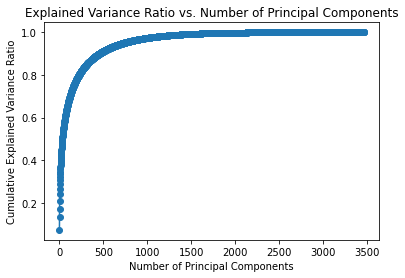

In [13]:
X_pca = m.do_pca(X_train)

In [14]:
pca = PCA(n_components = 100)
X_pca = pca.fit_transform(X_train)
explained_variance = pca.explained_variance_ratio_
variance_first_100 = explained_variance.sum()
print(f"Variance explained by first 100 components: {variance_first_100:.3f}")

Variance explained by first 100 components: 0.669


In [15]:
pca = PCA(n_components = 100)  
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

## Resampling

In [16]:
X_train_ros, y_train_ros = m.resampling_method('Oversampling',X_train_pca,y_train)

Resampled class counts:
0    7936
1    7936
Name: Fraudulent, dtype: int64


In [17]:
X_train_rus, y_train_rus = m.resampling_method('Undersampling',X_train_pca,y_train)

Resampled class counts:
0    588
1    588
Name: Fraudulent, dtype: int64


## Logistic regression (without tuning)

In [18]:
logistic_model = LogisticRegression(solver='liblinear',random_state = 4263)

logistic_model.fit(X_train_ros, y_train_ros)

# Make predictions
y_pred = logistic_model.predict(X_test_pca)

              precision    recall  f1-score   support

           0       0.99      0.89      0.94      1990
           1       0.36      0.84      0.51       142

    accuracy                           0.89      2132
   macro avg       0.68      0.87      0.72      2132
weighted avg       0.95      0.89      0.91      2132



{'accuracy': 0.8911819887429644,
 'precision': 0.3628048780487805,
 'recall': 0.8380281690140845,
 'f1_score': 0.5063829787234042}

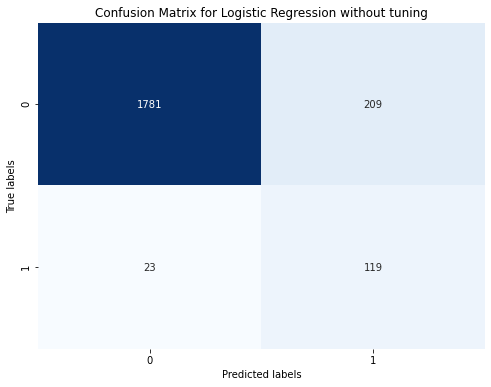

In [19]:
m.evaluate_model(y_test,y_pred,'Logistic Regression without tuning')

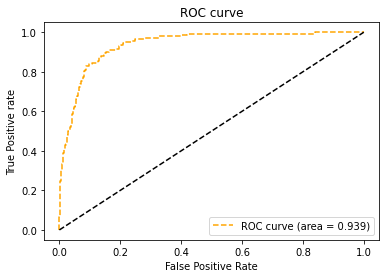

AUC score: 0.939


In [20]:
m.auc_roc(logistic_model,'Logistic Regression without tuning',X_test_pca,y_test)

              precision    recall  f1-score   support

           0       0.99      0.87      0.92      1990
           1       0.31      0.85      0.46       142

    accuracy                           0.87      2132
   macro avg       0.65      0.86      0.69      2132
weighted avg       0.94      0.87      0.89      2132



{'accuracy': 0.8658536585365854,
 'precision': 0.3134715025906736,
 'recall': 0.852112676056338,
 'f1_score': 0.4583333333333333}

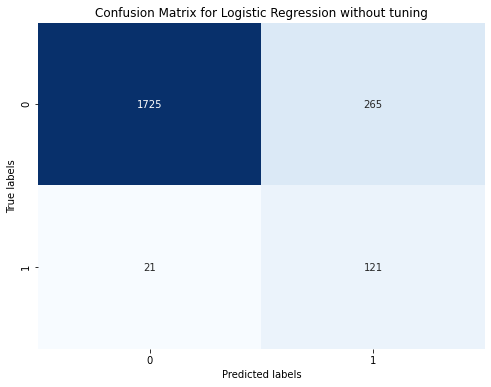

In [21]:
logistic_model.fit(X_train_rus, y_train_rus)

# Make predictions
y_pred = logistic_model.predict(X_test_pca)
m.evaluate_model(y_test,y_pred,'Logistic Regression without tuning')

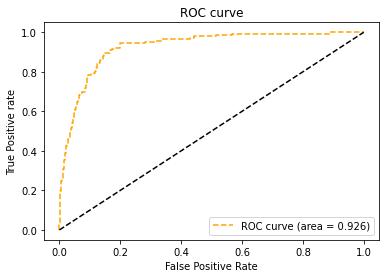

AUC score: 0.926


In [22]:
m.auc_roc(logistic_model,'Logistic Regression without tuning',X_test_pca,y_test)

## Logistic regression (with tuning)

In [23]:
f1_scorer = make_scorer(f1_score)
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],  # Regularization strength
    'penalty': ['l1', 'l2']  # L1 (Lasso) or L2 (Ridge) regularization
}

# Perform Grid Search with cross-validation
grid_search = GridSearchCV(logistic_model, 
                           param_grid, 
                           cv=5, 
                           scoring= f1_scorer,
                           n_jobs=-1)
grid_search.fit(X_train_ros,y_train_ros)

# Print the best parameters and corresponding accuracy
print("Best Parameters:", grid_search.best_params_)
print("Best Accuracy:", grid_search.best_score_)

# Evaluate on the test set
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test_pca)
print("Test Accuracy:", accuracy_score(y_test, y_pred))

Best Parameters: {'C': 0.01, 'penalty': 'l2'}
Best Accuracy: 0.8981745597095783
Test Accuracy: 0.8780487804878049


              precision    recall  f1-score   support

           0       0.99      0.88      0.93      1990
           1       0.34      0.85      0.48       142

    accuracy                           0.88      2132
   macro avg       0.66      0.87      0.71      2132
weighted avg       0.94      0.88      0.90      2132



{'accuracy': 0.8780487804878049,
 'precision': 0.33611111111111114,
 'recall': 0.852112676056338,
 'f1_score': 0.4820717131474104}

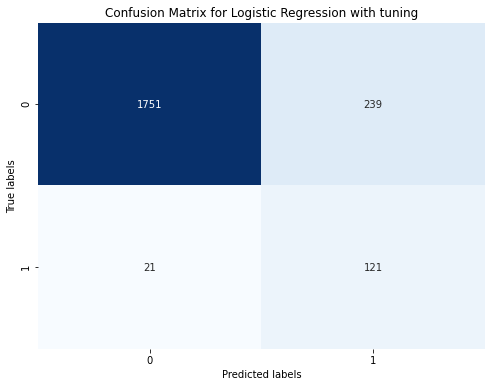

In [24]:
m.evaluate_model(y_test,y_pred,'Logistic Regression with tuning')

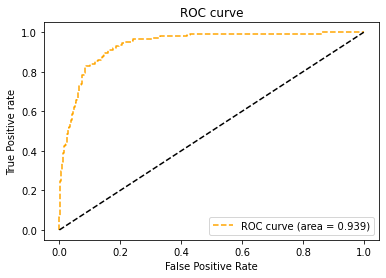

AUC score: 0.939


In [25]:
m.auc_roc(best_model,'Logistic Regression with tuning',X_test_pca,y_test)

In [27]:
grid_search.fit(X_train_rus,y_train_rus)
# Print the best parameters and corresponding accuracy
print("Best Parameters:", grid_search.best_params_)
print("Best Accuracy:", grid_search.best_score_)

# Evaluate on the test set
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test_pca)
print("Test Accuracy:", accuracy_score(y_test, y_pred))

Best Parameters: {'C': 0.1, 'penalty': 'l2'}
Best Accuracy: 0.8630820180129568
Test Accuracy: 0.8555347091932458


              precision    recall  f1-score   support

           0       0.99      0.85      0.92      1990
           1       0.30      0.87      0.45       142

    accuracy                           0.86      2132
   macro avg       0.64      0.86      0.68      2132
weighted avg       0.94      0.86      0.89      2132



{'accuracy': 0.8555347091932458,
 'precision': 0.2995169082125604,
 'recall': 0.8732394366197183,
 'f1_score': 0.4460431654676259}

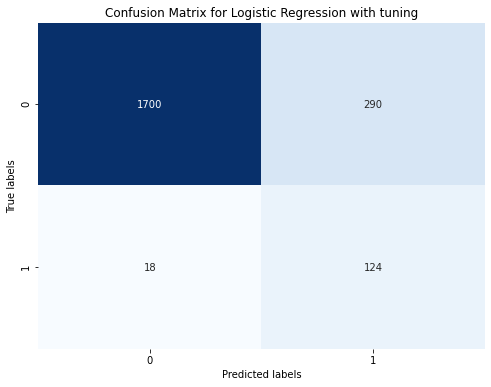

In [28]:
m.evaluate_model(y_test,y_pred,'Logistic Regression with tuning')

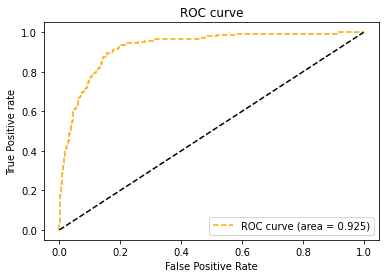

AUC score: 0.925


In [30]:
m.auc_roc(best_model,'Logistic Regression with tuning',X_test_pca,y_test)

## Decision Tree (without tuning)

In [31]:
from sklearn.tree import DecisionTreeClassifier

model_dt = DecisionTreeClassifier(random_state=4263)
model_dt.fit(X_train_ros, y_train_ros)
y_pred_dt = model_dt.predict(X_test_pca)

              precision    recall  f1-score   support

           0       0.97      0.97      0.97      1990
           1       0.57      0.57      0.57       142

    accuracy                           0.94      2132
   macro avg       0.77      0.77      0.77      2132
weighted avg       0.94      0.94      0.94      2132



{'accuracy': 0.9423076923076923,
 'precision': 0.5664335664335665,
 'recall': 0.5704225352112676,
 'f1_score': 0.5684210526315789}

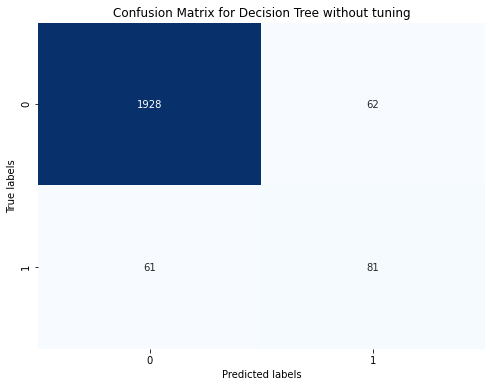

In [32]:
m.evaluate_model(y_test, y_pred_dt, 'Decision Tree without tuning')

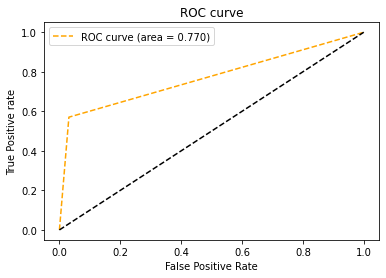

AUC score: 0.77


In [33]:
m.auc_roc(model_dt,'Decision tree',X_test_pca,y_test)

In [34]:
model_dt.fit(X_train_rus, y_train_rus)
y_pred_dt = model_dt.predict(X_test_pca)

              precision    recall  f1-score   support

           0       0.98      0.85      0.91      1990
           1       0.27      0.77      0.40       142

    accuracy                           0.85      2132
   macro avg       0.63      0.81      0.66      2132
weighted avg       0.93      0.85      0.88      2132



{'accuracy': 0.8475609756097561,
 'precision': 0.2718204488778055,
 'recall': 0.7676056338028169,
 'f1_score': 0.4014732965009208}

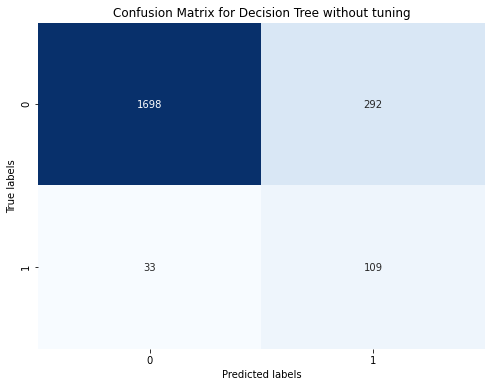

In [35]:
m.evaluate_model(y_test, y_pred_dt, 'Decision Tree without tuning')

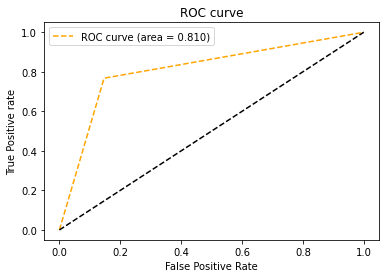

AUC score: 0.81


In [36]:
m.auc_roc(model_dt,'Decision tree',X_test_pca,y_test)

## Decision Tree (with tuning)

In [37]:
from sklearn.model_selection import GridSearchCV

#Hyperparameter tuning
param_grid = {
    'max_depth': [3, 5, 10, 15], #avoid overfitting
    'min_samples_split': [2, 5, 10], 
    'min_samples_leaf': [1, 5, 10],   
    'criterion': ['gini', 'entropy']
}

model_dt = DecisionTreeClassifier(random_state=42)
grid_search = GridSearchCV(model_dt, param_grid, cv=5, scoring='f1', n_jobs=-1)
grid_search.fit(X_train_ros, y_train_ros)

#best
print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'criterion': 'entropy', 'max_depth': 15, 'min_samples_leaf': 1, 'min_samples_split': 10}


              precision    recall  f1-score   support

           0       0.97      0.96      0.97      1990
           1       0.51      0.54      0.52       142

    accuracy                           0.93      2132
   macro avg       0.74      0.75      0.74      2132
weighted avg       0.94      0.93      0.94      2132



{'accuracy': 0.9348030018761726,
 'precision': 0.5100671140939598,
 'recall': 0.5352112676056338,
 'f1_score': 0.5223367697594503}

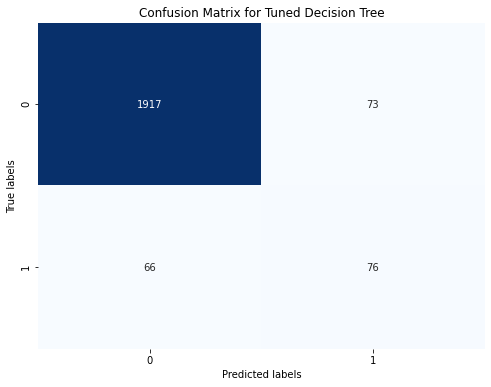

In [39]:
best_model_dt = DecisionTreeClassifier(
    criterion='entropy',
    max_depth=15,
    min_samples_leaf=1,
    min_samples_split=2,
    random_state=42
)
best_model_dt.fit(X_train_ros, y_train_ros)
y_pred_dt_best = best_model_dt.predict(X_test_pca)

m.evaluate_model(y_test, y_pred_dt_best, 'Tuned Decision Tree')

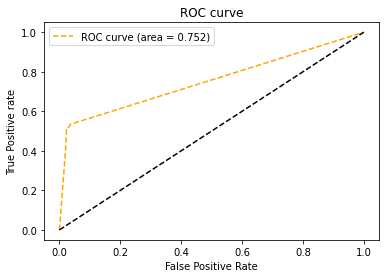

AUC score: 0.752


In [40]:
m.auc_roc(best_model_dt,'Decision tree',X_test_pca,y_test)

In [41]:
grid_search.fit(X_train_rus, y_train_rus)
print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'criterion': 'gini', 'max_depth': 15, 'min_samples_leaf': 1, 'min_samples_split': 5}


              precision    recall  f1-score   support

           0       0.98      0.85      0.91      1990
           1       0.26      0.73      0.38       142

    accuracy                           0.84      2132
   macro avg       0.62      0.79      0.65      2132
weighted avg       0.93      0.84      0.88      2132



{'accuracy': 0.8433395872420263,
 'precision': 0.25879396984924624,
 'recall': 0.7253521126760564,
 'f1_score': 0.38148148148148153}

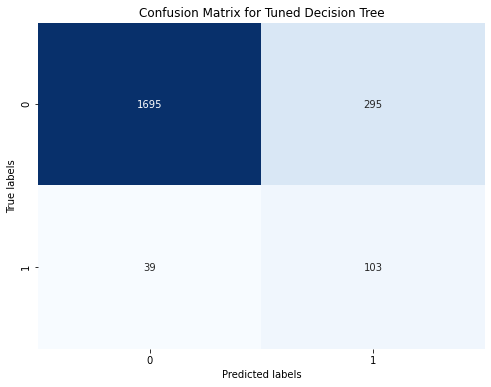

In [42]:
best_model_dt = DecisionTreeClassifier(
    criterion='gini',
    max_depth=15,
    min_samples_leaf=1,
    min_samples_split=5,
    random_state=4263
)
best_model_dt.fit(X_train_rus, y_train_rus)
y_pred_dt_best = best_model_dt.predict(X_test_pca)

m.evaluate_model(y_test, y_pred_dt_best, 'Tuned Decision Tree')

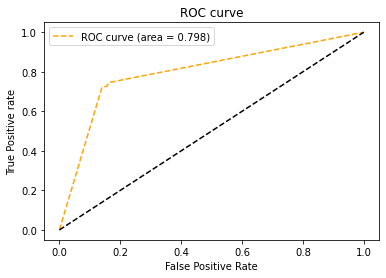

AUC score: 0.798


In [44]:
m.auc_roc(best_model_dt,'Decision Tree',X_test_pca,y_test)

## XGBoost

In [45]:
#XGBoost classifier initial
model_xgb = xgb.XGBClassifier(
    n_estimators=100, 
    max_depth=6,           
    learning_rate=0.1,     
    random_state=4263,    
    scale_pos_weight=1,   
    eval_metric="mlogloss"
)

              precision    recall  f1-score   support

           0       0.98      0.99      0.98      1990
           1       0.86      0.67      0.75       142

    accuracy                           0.97      2132
   macro avg       0.92      0.83      0.87      2132
weighted avg       0.97      0.97      0.97      2132



{'accuracy': 0.9704502814258912,
 'precision': 0.8558558558558559,
 'recall': 0.6690140845070423,
 'f1_score': 0.7509881422924902}

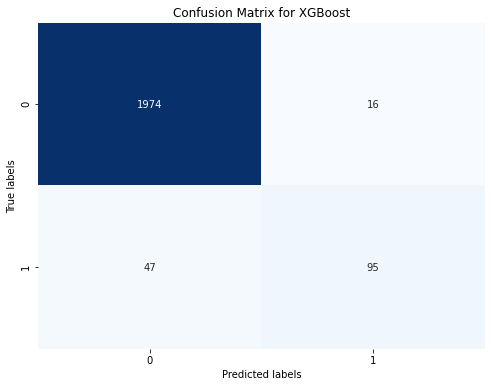

In [46]:
#train
model_xgb.fit(X_train_ros, y_train_ros)

#predictions
y_pred_xgb = model_xgb.predict(X_test_pca)

#evaluations 
m.evaluate_model(y_test, y_pred_xgb, 'XGBoost')

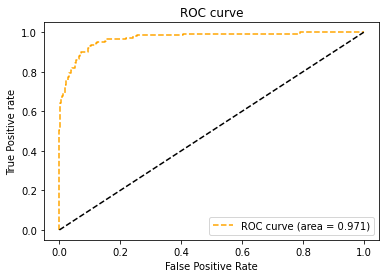

AUC score: 0.971


In [47]:
m.auc_roc(model_xgb,'XGBoost',X_test_pca,y_test)

              precision    recall  f1-score   support

           0       0.99      0.89      0.94      1990
           1       0.37      0.87      0.51       142

    accuracy                           0.89      2132
   macro avg       0.68      0.88      0.73      2132
weighted avg       0.95      0.89      0.91      2132



{'accuracy': 0.8911819887429644,
 'precision': 0.36607142857142855,
 'recall': 0.8661971830985915,
 'f1_score': 0.5146443514644351}

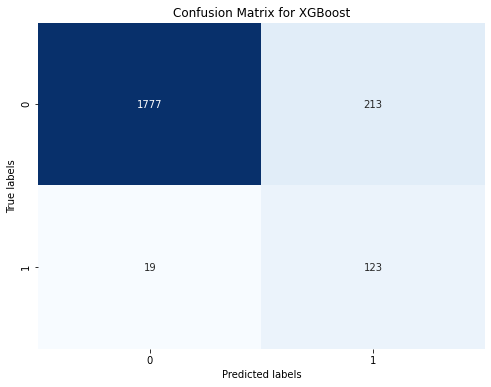

In [48]:
#train
model_xgb.fit(X_train_rus, y_train_rus)

#predictions
y_pred_xgb = model_xgb.predict(X_test_pca)

#evaluations 
m.evaluate_model(y_test, y_pred_xgb, 'XGBoost')

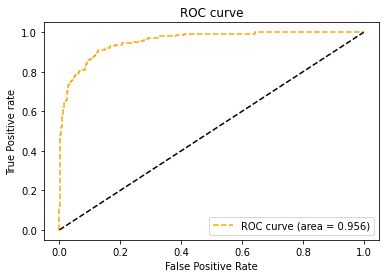

AUC score: 0.956


In [49]:
m.auc_roc(model_xgb,'XGBoost',X_test_pca,y_test)

## Random Forest (without tuning)

In [50]:
rfc = RandomForestClassifier(random_state = 4263)
rfc.fit(X_train_ros, y_train_ros)
y_pred = rfc.predict(X_test_pca)

              precision    recall  f1-score   support

           0       0.97      1.00      0.98      1990
           1       0.99      0.50      0.66       142

    accuracy                           0.97      2132
   macro avg       0.98      0.75      0.82      2132
weighted avg       0.97      0.97      0.96      2132



{'accuracy': 0.9662288930581614,
 'precision': 0.9861111111111112,
 'recall': 0.5,
 'f1_score': 0.6635514018691588}

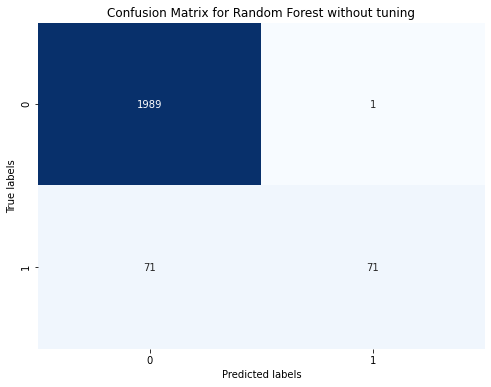

In [51]:
m.evaluate_model(y_test,y_pred,'Random Forest without tuning')

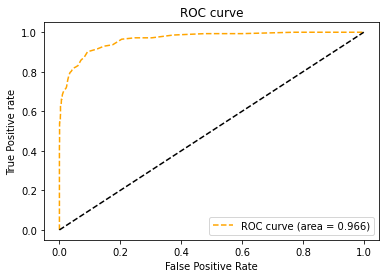

AUC score: 0.966


In [52]:
m.auc_roc(rfc,'Random Forest without tuning',X_test_pca,y_test)

              precision    recall  f1-score   support

           0       0.99      0.92      0.95      1990
           1       0.42      0.83      0.55       142

    accuracy                           0.91      2132
   macro avg       0.70      0.87      0.75      2132
weighted avg       0.95      0.91      0.92      2132



{'accuracy': 0.9108818011257036,
 'precision': 0.4154929577464789,
 'recall': 0.8309859154929577,
 'f1_score': 0.5539906103286386}

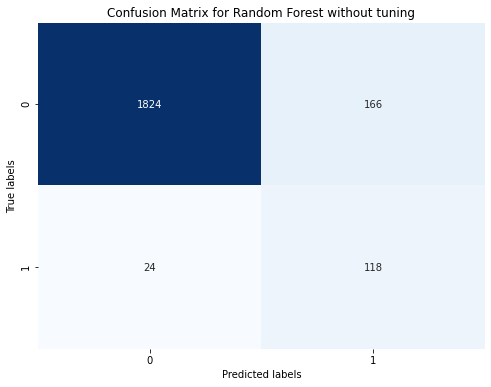

In [53]:
rfc.fit(X_train_rus, y_train_rus)
y_pred = rfc.predict(X_test_pca)
m.evaluate_model(y_test,y_pred,'Random Forest without tuning')

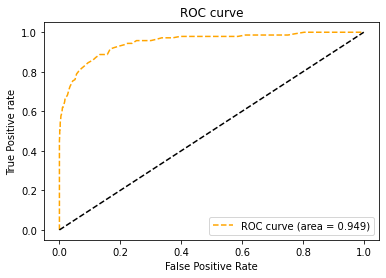

AUC score: 0.949


In [54]:
m.auc_roc(rfc,'Random Forest without tuning',X_test_pca,y_test)

## Random Forest (with tuning)

In [55]:
rfc = RandomForestClassifier(random_state = 4263, 
                             max_features = 'sqrt',
                             min_samples_leaf = 5,
                             min_samples_split = 5,
                             n_estimators= 100,
                             max_depth = 10, 
                             criterion = 'gini',
                             n_jobs=-1)
rfc.fit(X_train_ros, y_train_ros)
y_pred = rfc.predict(X_test_pca)

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1990
           1       0.78      0.64      0.71       142

    accuracy                           0.96      2132
   macro avg       0.88      0.81      0.84      2132
weighted avg       0.96      0.96      0.96      2132



{'accuracy': 0.9643527204502814,
 'precision': 0.7844827586206896,
 'recall': 0.6408450704225352,
 'f1_score': 0.7054263565891472}

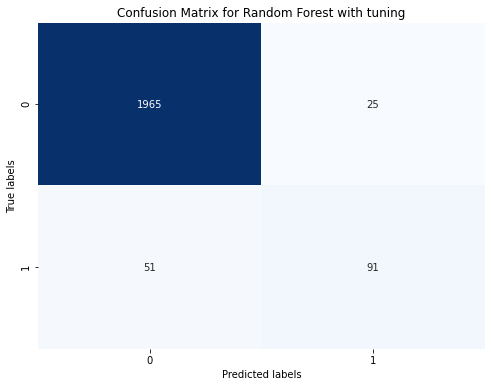

In [56]:
m.evaluate_model(y_test,y_pred,'Random Forest with tuning')

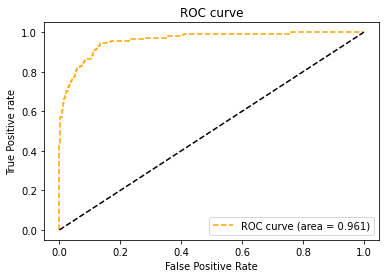

AUC score: 0.961


In [57]:
m.auc_roc(rfc,'Random Forest with tuning',X_test_pca,y_test)

              precision    recall  f1-score   support

           0       0.98      0.91      0.94      1990
           1       0.38      0.80      0.52       142

    accuracy                           0.90      2132
   macro avg       0.68      0.86      0.73      2132
weighted avg       0.94      0.90      0.92      2132



{'accuracy': 0.901031894934334,
 'precision': 0.3838383838383838,
 'recall': 0.8028169014084507,
 'f1_score': 0.5193621867881549}

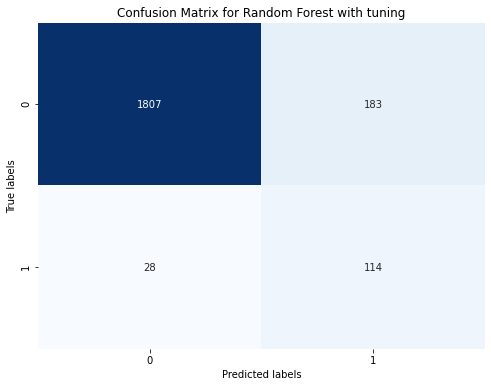

In [58]:
rfc.fit(X_train_rus, y_train_rus)
y_pred = rfc.predict(X_test_pca)
m.evaluate_model(y_test,y_pred,'Random Forest with tuning')

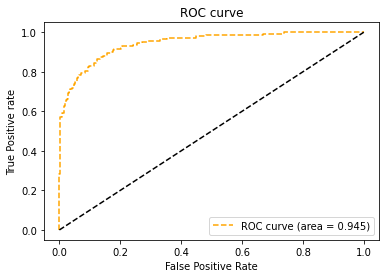

AUC score: 0.945


In [59]:
m.auc_roc(rfc,'Random Forest with tuning',X_test_pca,y_test)

## Neural Networks

In [60]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.optimizers import Adam

In [61]:
num_features = X_train_ros.shape[1]
print(num_features)

100


In [62]:
# Build the model
nn_model = Sequential([
    Input(shape=(num_features,)),  # Input layer
    Dense(128, activation='relu'), # First hidden layer
    Dense(64, activation='relu'),  # Second hidden layer
    Dense(32, activation='relu'),  # Third hidden layer
    Dense(1, activation='sigmoid') # Output layer (binary classification)
])
optimizer = Adam(learning_rate=0.001)  
nn_model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy',tf.keras.metrics.Recall()])

# Print model summary
nn_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               12928     
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 1)                 33        
                                                                 
Total params: 23297 (91.00 KB)
Trainable params: 23297 (91.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [63]:
nn_model.fit(X_train_ros,
             y_train_ros,
             epochs=10, 
             batch_size=32,
             validation_data=(X_test_pca, y_test))

Epoch 1/10
496/496 [==============================] - 7s 7ms/step - loss: 0.1293 - accuracy: 0.9514 - recall: 0.9657 - val_loss: 0.0975 - val_accuracy: 0.9714 - val_recall: 0.7535
Epoch 2/10
496/496 [==============================] - 2s 5ms/step - loss: 0.0208 - accuracy: 0.9944 - recall: 0.9979 - val_loss: 0.1137 - val_accuracy: 0.9658 - val_recall: 0.7676
Epoch 3/10
496/496 [==============================] - 3s 5ms/step - loss: 0.0081 - accuracy: 0.9977 - recall: 0.9986 - val_loss: 0.1425 - val_accuracy: 0.9733 - val_recall: 0.7113
Epoch 4/10
496/496 [==============================] - 2s 5ms/step - loss: 0.0031 - accuracy: 0.9994 - recall: 0.9996 - val_loss: 0.1502 - val_accuracy: 0.9761 - val_recall: 0.7254
Epoch 5/10
496/496 [==============================] - 2s 5ms/step - loss: 0.0120 - accuracy: 0.9965 - recall: 0.9968 - val_loss: 0.1455 - val_accuracy: 0.9742 - val_recall: 0.7465
Epoch 6/10
496/496 [==============================] - 3s 5ms/step - loss: 0.0074 - accuracy: 0.9978 

In [64]:
results = nn_model.evaluate(X_test_pca, y_test)
accuracy = results[1]
recall = results[2]
print(f"Test Accuracy: {accuracy:.4f}")
print(f"Test Recall: {recall:.4f}")

67/67 [==============================] - 0s 3ms/step - loss: 0.2007 - accuracy: 0.9775 - recall: 0.7324
Test Accuracy: 0.9775
Test Recall: 0.7324


In [65]:
y_pred = nn_model.predict(X_test_pca)
y_pred = np.round(y_pred).tolist()

67/67 [==============================] - 1s 3ms/step


              precision    recall  f1-score   support

           0       0.98      0.99      0.99      1990
           1       0.91      0.73      0.81       142

    accuracy                           0.98      2132
   macro avg       0.95      0.86      0.90      2132
weighted avg       0.98      0.98      0.98      2132



{'accuracy': 0.9774859287054409,
 'precision': 0.9122807017543859,
 'recall': 0.7323943661971831,
 'f1_score': 0.8124999999999999}

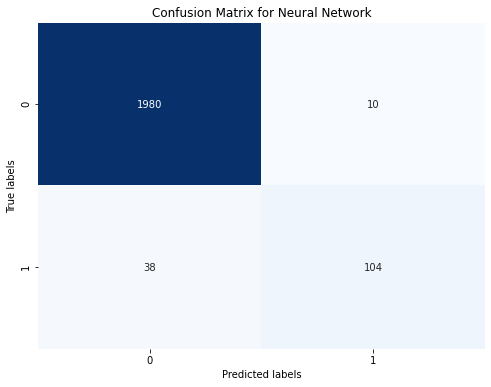

In [66]:
m.evaluate_model(y_test,y_pred,'Neural Network')

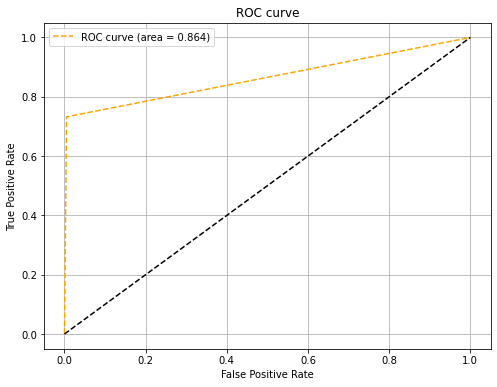

In [67]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
auc_score = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, linestyle='--',color='orange', label ='ROC curve (area = %0.3f)' % auc_score)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.grid(True)
plt.show()

In [68]:
nn_model.fit(X_train_rus,
             y_train_rus,
             epochs=10, 
             batch_size=32,
             validation_data=(X_test_pca, y_test))

Epoch 1/10
37/37 [==============================] - 2s 14ms/step - loss: 7.7089e-05 - accuracy: 1.0000 - recall: 1.0000 - val_loss: 0.1996 - val_accuracy: 0.9775 - val_recall: 0.7324
Epoch 2/10
37/37 [==============================] - 1s 15ms/step - loss: 6.7785e-05 - accuracy: 1.0000 - recall: 1.0000 - val_loss: 0.1994 - val_accuracy: 0.9775 - val_recall: 0.7324
Epoch 3/10
37/37 [==============================] - 0s 11ms/step - loss: 6.1070e-05 - accuracy: 1.0000 - recall: 1.0000 - val_loss: 0.1987 - val_accuracy: 0.9770 - val_recall: 0.7324
Epoch 4/10
37/37 [==============================] - 0s 12ms/step - loss: 5.5891e-05 - accuracy: 1.0000 - recall: 1.0000 - val_loss: 0.1981 - val_accuracy: 0.9770 - val_recall: 0.7324
Epoch 5/10
37/37 [==============================] - 0s 12ms/step - loss: 5.1630e-05 - accuracy: 1.0000 - recall: 1.0000 - val_loss: 0.1977 - val_accuracy: 0.9765 - val_recall: 0.7324
Epoch 6/10
37/37 [==============================] - 0s 11ms/step - loss: 4.8106e-05 -

In [69]:
results = nn_model.evaluate(X_test_pca, y_test)
accuracy = results[1]
recall = results[2]
print(f"Test Accuracy: {accuracy:.4f}")
print(f"Test Recall: {recall:.4f}")

67/67 [==============================] - 0s 3ms/step - loss: 0.1962 - accuracy: 0.9761 - recall: 0.7324
Test Accuracy: 0.9761
Test Recall: 0.7324


67/67 [==============================] - 0s 3ms/step
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      1990
           1       0.89      0.73      0.80       142

    accuracy                           0.98      2132
   macro avg       0.94      0.86      0.90      2132
weighted avg       0.97      0.98      0.97      2132



{'accuracy': 0.976078799249531,
 'precision': 0.8888888888888888,
 'recall': 0.7323943661971831,
 'f1_score': 0.8030888030888031}

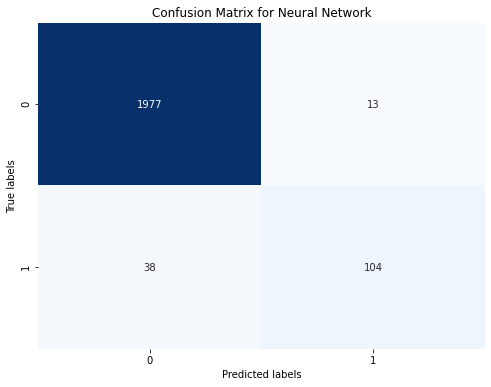

In [70]:
y_pred = nn_model.predict(X_test_pca)
y_pred = np.round(y_pred).tolist()
m.evaluate_model(y_test,y_pred,'Neural Network')

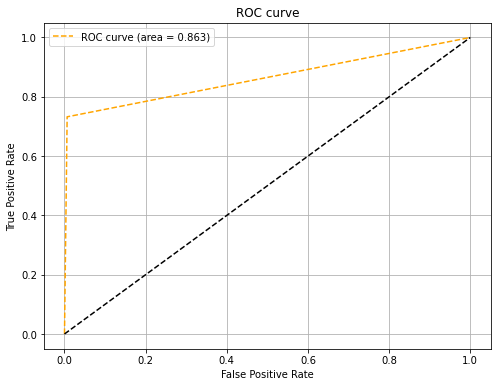

In [71]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
auc_score = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, linestyle='--',color='orange', label ='ROC curve (area = %0.3f)' % auc_score)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.grid(True)
plt.show()